# 價差Alpha策略

### 首先第一步獲取資料!-利用pandas data-reader

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
df = pd.read_excel("C:/Users/user/Downloads/beast123.xlsx",index = True)

# zip的差別什麼?

In [758]:
df.head()

,Dates,Futures,PX_VOLUME,ETF.price,net.price,spread,bb,spot,basis,etf-futures
0,2015-01-02,15.768,31561,15.5300,15.4550,0.0750,0.004829,15.7450,0.0230,-0.2380
1,2015-01-05,16.213,47134,15.9001,15.6219,0.2782,0.017497,16.1925,0.0205,-0.3129
2,2015-01-06,16.637,43728,16.2700,16.0251,0.2449,0.015052,16.5330,0.1040,-0.3670
3,2015-01-07,16.544,35680,16.3200,16.0643,0.2557,0.015668,16.5385,0.0055,-0.2240
4,2015-01-08,16.385,27837,16.0500,16.1035,-0.0535,-0.003333,16.3638,0.0212,-0.3350


In [3]:
close_df=pd.DataFrame(df["Futures"])
close_df = close_df.join(df["ETF.price"])

In [4]:
close_df

,Futures,ETF.price
0,15.768,15.5300
1,16.213,15.9001
2,16.637,16.2700
3,16.544,16.3200
4,16.385,16.0500
...,...,...
1482,24.048,23.3200
1483,24.363,23.3800
1484,23.633,22.8000
1485,23.300,22.4600


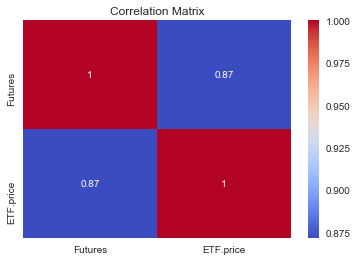

In [5]:
import seaborn as sns
sns.heatmap(close_df.pct_change(1).corr(),annot=True,cmap='coolwarm')
plt.ylim([2,0])
plt.title('Correlation Matrix');

# 回測Model

In [6]:
stock_1='Futures'
stock_2='ETF.price'

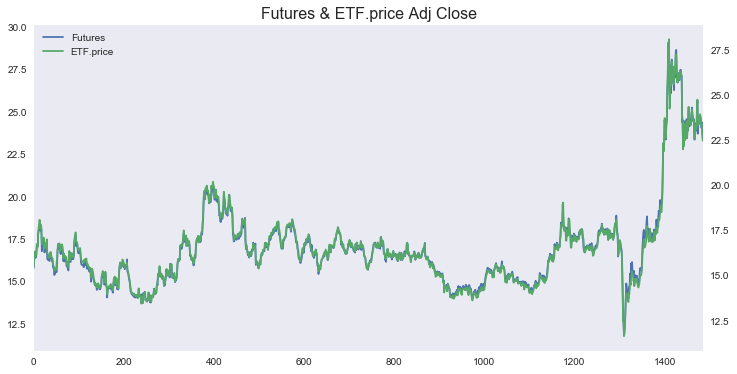

In [7]:
plt.figure(figsize=(12,6))
ax=close_df[stock_1].plot()
ax2=close_df[stock_2].plot(secondary_y=True)
plt.grid()
lines = ax.get_lines() + ax2.get_lines()

plt.legend(lines, [l.get_label() for l in lines])
plt.title('{} & {} Adj Close'.format(stock_1,stock_2),fontsize=16);

In [8]:
#計算價差比例
Spread_Ratio=close_df[stock_1]/close_df[stock_2]
Spread_Ratio_Mean=Spread_Ratio.mean()
Spread_Ratio_Std=Spread_Ratio.std()


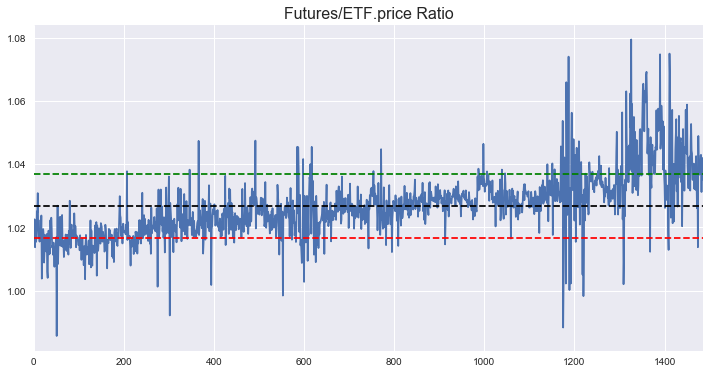

In [9]:
crit=1

plt.figure(figsize=(12,6))
Spread_Ratio.plot(label='Ratio')
plt.title('{}/{} Ratio'.format(stock_1,stock_2),fontsize=16);

plt.axhline(Spread_Ratio_Mean,label='Mean',ls='--',c='black')
plt.axhline(Spread_Ratio_Mean+crit*Spread_Ratio_Std,label='Upper bound',ls='--',c='g')
plt.axhline(Spread_Ratio_Mean-crit*Spread_Ratio_Std,label='Lower bound',ls='--',c='r');


# 暴雷禁止線

In [1086]:
window=50
upcrit=3
downcrit = 4
Spread_Ratio_MA=Spread_Ratio.rolling(window=window).mean()
Spread_Ratio_rolling_Std=Spread_Ratio.rolling(window=window).std()
upper_bound=Spread_Ratio_MA+upcrit*Spread_Ratio_rolling_Std
lower_bound=Spread_Ratio_MA-downcrit*Spread_Ratio_rolling_Std

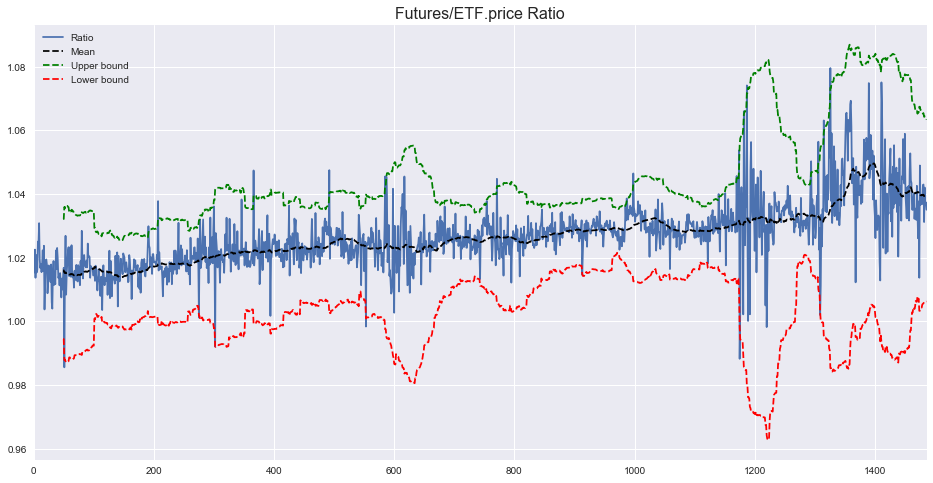

In [1087]:
plt.figure(figsize=(16,8))
Spread_Ratio.plot(label='Ratio')
plt.title('{}/{} Ratio'.format(stock_1,stock_2),fontsize=16);
Spread_Ratio_MA.plot(label='Mean',ls='--',c='black')
upper_bound.plot(label='Upper bound',ls='--',c='g')
lower_bound.plot(label='Lower bound',ls='--',c='r');

plt.legend();

In [1117]:
#計算交易訊號
signal = np.zeros(len(Spread_Ratio))
days = 1
iteration = range(1,1486)
up = (Spread_Ratio > 1.063)
down = (Spread_Ratio < 1.007)
for i in iteration :
    if (up[i] and (sum(signal[0:(i)]) > -1) )  == True:
        signal[i] = -1
    elif ((sum(signal[0:(i-days+1)]) == -1)and (signal[i] == 0)  ) == True:
        signal[i] = 1   
    elif (down[i] and (sum(signal[0:(i)]) < 1)) == True:
        signal[i] = 1 ##ok
    elif ((sum(signal[0:(i-days+1)]) ==1) and (signal[i] == 0) ) == True:
        signal[i] = -1    
# for i in iteration:
    
#     if(up[i] and down[i]) == False:
#         signal[i] =0
#     elif ((sum(signal[0:(i-days+1)]) == -1)  and (signal[i] == 0) ) == True:
#         signal[i] = 1
#     elif ((sum(signal[0:(i-days+1)]) ==1) and (signal[i] == 0)  ) == True:
#         signal[i] = -1
#     elif ( sum(signal[0:(i+1)]) == signal[i])== True:
#         signal[i] = 0
#     else:
#         signal[i] = 0
        
#if sum(signal) == 1 :
  #  signal[-1] = -1
#elif sum(signal) == -1:
    #signal[-1] = 1
#else : 
  #  signal[-1] =0
#print(signal)

In [1118]:
(sum(signal))

0.0

In [1119]:
signal_df=pd.Series(signal,index=Spread_Ratio.index)
kk =(signal_df[signal == -1])
kk2 = signal_df[signal == 1]
print(kk)

19     -1.0
31     -1.0
52     -1.0
115    -1.0
141    -1.0
276    -1.0
303    -1.0
395    -1.0
554    -1.0
601    -1.0
1176   -1.0
1182   -1.0
1187   -1.0
1190   -1.0
1193   -1.0
1219   -1.0
1221   -1.0
1310   -1.0
1315   -1.0
1326   -1.0
1352   -1.0
1356   -1.0
1359   -1.0
1390   -1.0
1411   -1.0
dtype: float64


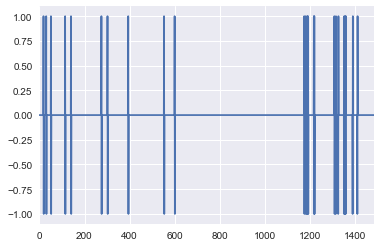

In [1120]:
signal_df.plot()

In [1121]:
position_df=signal_df.shift(1)

In [1122]:
#計算多空部位

pd.DataFrame(position_df)

,0
0,NaN
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1482,0.0
1483,0.0
1484,0.0
1485,0.0


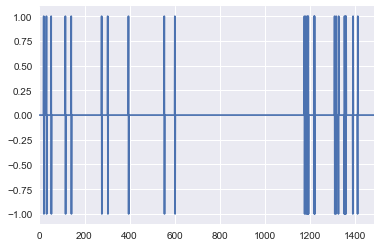

In [1123]:
position_df.plot()

In [1140]:
wealth_1 = 200000-110000
wealth_2 = 110000
hold_number1=0
short_number1=0
hold_number2=0
short_number2=0
signal_df_2 = -signal_df

In [1141]:
trade_stock_df=pd.concat([(signal_df*close_df[stock_1]).shift(1),(signal_df_2*close_df[stock_2]).shift(1)],axis=1,keys=[stock_1,stock_2])

In [1142]:
#計算交易股數
iteration = range(1,1486)
for i in iteration:
    if (trade_stock_df[stock_1][i]>0 and sum(position_df[1:i])==0)==True:
        trade_stock_df[stock_1][i] = wealth_1*0.9998/trade_stock_df[stock_1][i]
        wealth_1 = 0
        hold_number1 = trade_stock_df[stock_1][i]
    elif (trade_stock_df[stock_1][i] < 0 and sum(position_df[1:i])==0)==True:
        trade_stock_df[stock_1][i] = wealth_1*0.9998/trade_stock_df[stock_1][i]
        wealth_1 = 1.9998*wealth_1
        short_number1 = trade_stock_df[stock_1][i]
    elif (trade_stock_df[stock_1][i]>0 and sum(position_df[1:i])<0)==True:
        wealth_1 = trade_stock_df[stock_1][i]*short_number1*0.9998
        trade_stock_df[stock_1][i] = short_number1
        short_number1 = 0
    elif (trade_stock_df[stock_1][i]<0 and sum(position_df[1:i])>0)==True:
        wealth_1 = -1*trade_stock_df[stock_1][i]*hold_number1*0.9998
        trade_stock_df[stock_1][i] = hold_number1
        hold_number1 = 0 
        
        
for i in iteration:
    if (trade_stock_df[stock_2][i]>0 and sum(-position_df[1:i])==0)==True:
        trade_stock_df[stock_2][i] = (wealth_2*0.9998)/trade_stock_df[stock_2][i]
        wealth_2 = 0
        hold_number2 = trade_stock_df[stock_2][i]
    elif (trade_stock_df[stock_2][i] < 0 and sum(-position_df[1:i])==0)==True:
        trade_stock_df[stock_2][i] = (wealth_2*0.9998)/trade_stock_df[stock_2][i]
        wealth_2 = 1.9998*wealth_2
        short_number2 = trade_stock_df[stock_2][i]
    elif (trade_stock_df[stock_2][i]>0 and sum(-position_df[1:i])<0)==True:
        wealth_2 = wealth_2+trade_stock_df[stock_2][i]*short_number2*0.9998
        trade_stock_df[stock_2][i] = short_number2
        short_number2 = 0
    elif (trade_stock_df[stock_2][i]<0 and sum(-position_df[1:i])>0)==True:
        wealth_2 = -1*trade_stock_df[stock_2][i]*hold_number2*0.9998
        trade_stock_df[stock_2][i] = hold_number2
        hold_number2 = 0    

In [1143]:
trade_stock_df[stock_1][190:200]

190    0.0
191    0.0
192    0.0
193    0.0
194    0.0
195    0.0
196    0.0
197    0.0
198    0.0
199    0.0
Name: Futures, dtype: float64

trade_stock_df[stock_1] = stock_number_1
trade_stock_df[stock_2] = stock_number_2

In [1144]:
return_df=pd.concat([(close_df[stock_1]).diff(1),(close_df[stock_2]).diff(1)],axis=1,keys=[stock_1,stock_2])

In [1145]:
return_df

,Futures,ETF.price
0,NaN,NaN
1,0.445,0.3701
2,0.424,0.3699
3,-0.093,0.0500
4,-0.159,-0.2700
...,...,...
1482,-0.400,-0.1200
1483,0.315,0.0600
1484,-0.730,-0.5800
1485,-0.333,-0.3400


In [1146]:
(return_df*trade_stock_df).cumsum()

,Futures,ETF.price
0,NaN,NaN
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
1482,49292.746843,65737.679443
1483,49292.746843,65737.679443
1484,49292.746843,65737.679443
1485,49292.746843,65737.679443


In [1147]:
trade_return_df=(return_df*trade_stock_df)
cum_trade_return_df=(return_df*trade_stock_df).cumsum()
cum_trade_return_df['Total Return']=cum_trade_return_df.sum(axis=1)

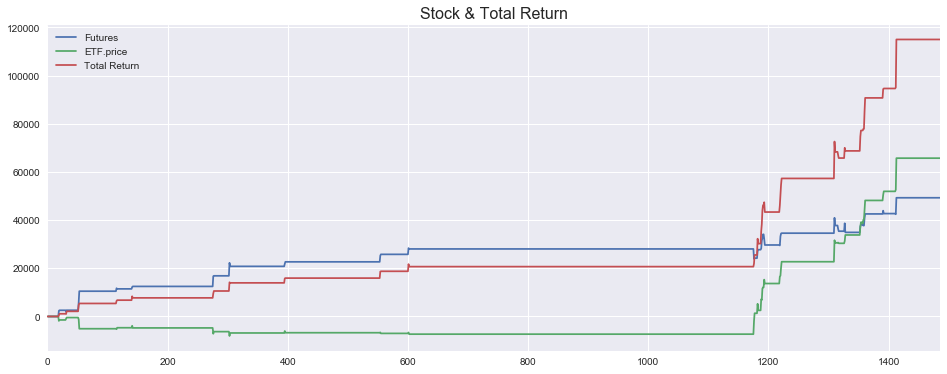

In [1148]:
fig,ax=plt.subplots(figsize=(16,6))

cum_trade_return_df.plot(label='Total Return',ax=ax)
plt.legend()
plt.title('Stock & Total Return',fontsize=16);

In [1149]:
cum_trade_percent_return=(cum_trade_return_df['Total Return']/(wealth_1+wealth_2))*100

Text(0.5, 1.0, 'Cumulative Return')

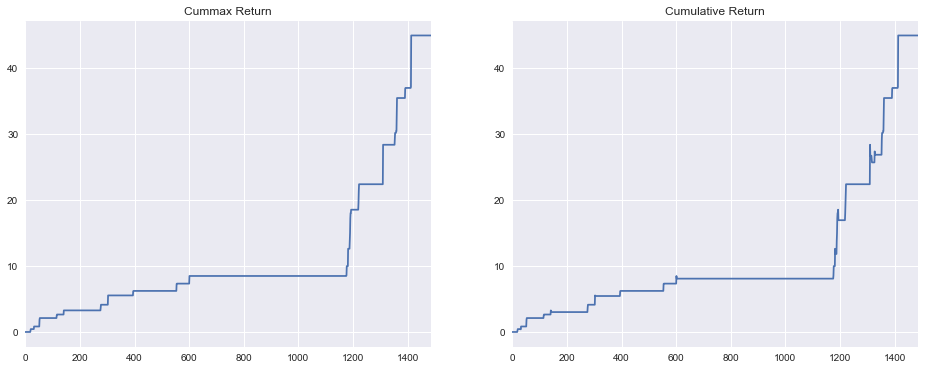

In [1150]:
fig=plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
cum_trade_percent_return.cummax().plot()
plt.title('Cummax Return')
plt.subplot(1,2,2)
cum_trade_percent_return.plot()
plt.title('Cumulative Return')

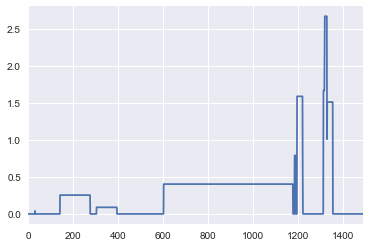

In [1151]:
MDD_series=cum_trade_percent_return.cummax()-cum_trade_percent_return
MDD_series.plot()

In [1152]:
high_index=cum_trade_percent_return[cum_trade_percent_return.cummax()==cum_trade_percent_return].index

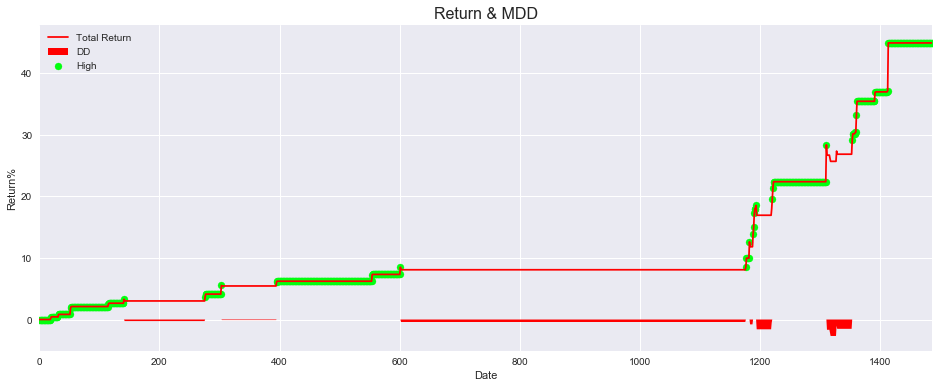

In [1153]:
fig,ax=plt.subplots(figsize=(16,6))

(cum_trade_percent_return).plot(label='Total Return',ax=ax,c='r')
plt.fill_between(MDD_series.index,-MDD_series,0,facecolor='r',label='DD')
plt.scatter(high_index,cum_trade_percent_return.loc[high_index],c='#02ff0f',label='High')

plt.legend()
plt.ylabel('Return%')
plt.xlabel('Date')
plt.title('Return & MDD',fontsize=16);


In [1154]:
MDD=round(MDD_series.max(),2)
Cumulative_Return=round(cum_trade_percent_return.iloc[-1],2)
Return_on_MDD=round(cum_trade_percent_return.iloc[-1]/MDD_series.max(),2)
daily_return=cum_trade_percent_return.diff(1)

print('Cumulative Return: {}%'.format(Cumulative_Return))
print('MDD: {}%'.format(MDD))
print('Return on MDD: {}'.format(Return_on_MDD))
print('Shapre Ratio: {}'.format(round((daily_return.mean()/daily_return.std())*pow(252,0.5),2)))

Cumulative Return: 44.91%
MDD: 2.67%
Return on MDD: 16.8
Shapre Ratio: 1.45


In [1015]:
abs(position_df.diff(1)).sum()*0.005650*100

55.37

# 建立投資組合

In [39]:
pair_dict={}
pair_dict['pair_1']=['2302','2329']
pair_dict['pair_2']=['2302','2303']
pair_dict['pair_3']=['2303','2337']

In [40]:
pair_dict

{'pair_1': ['2302', '2329'],
 'pair_2': ['2302', '2303'],
 'pair_3': ['2303', '2337']}

In [41]:
for key,value in pair_dict.items():
    print(key,value)

pair_1 ['2302', '2329']
pair_2 ['2302', '2303']
pair_3 ['2303', '2337']


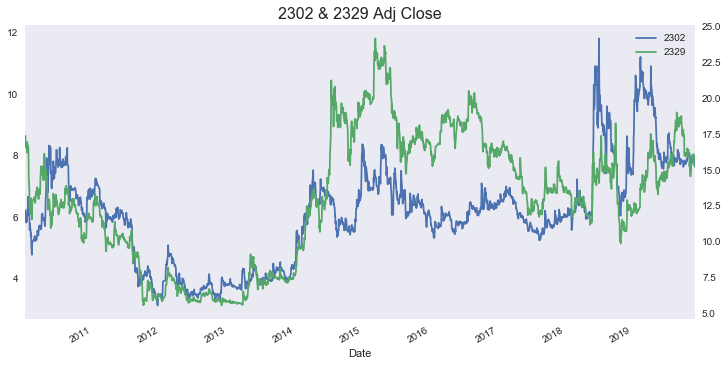

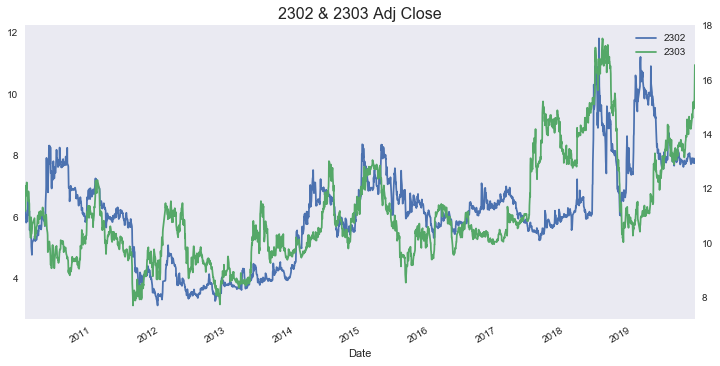

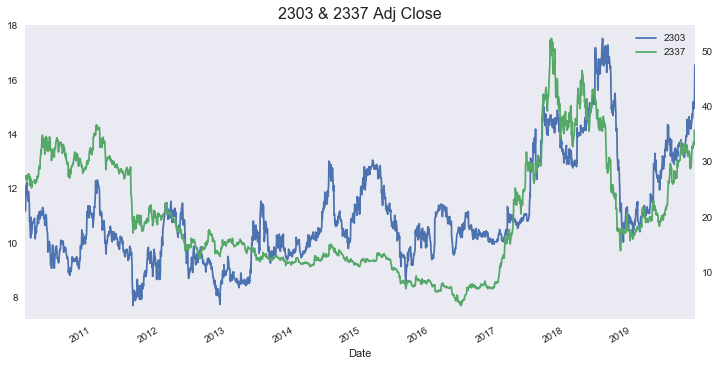

In [42]:
for key,value in pair_dict.items():
    plt.figure(figsize=(12,6))
    ax=close_df[value[0]].plot()
    ax2=close_df[value[1]].plot(secondary_y=True)
    plt.grid()
    lines = ax.get_lines() + ax2.get_lines()

    plt.legend(lines, [l.get_label() for l in lines])
    plt.title('{} & {} Adj Close'.format(value[0],value[1]),fontsize=16);

In [43]:
#建立價差序列字典
Spread_Ratio_dict={}

In [44]:
#計算價差比例
for key,value in pair_dict.items():
    Spread_Ratio=close_df[value[0]]/close_df[value[1]]
    Spread_Ratio_Mean=Spread_Ratio.mean()
    Spread_Ratio_Std=Spread_Ratio.std()
    Spread_Ratio_dict[key]=Spread_Ratio

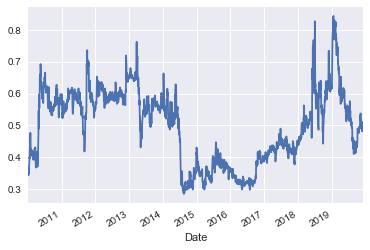

In [45]:
Spread_Ratio_dict['pair_1'].plot()

In [46]:
window=60
crit=1

Spread_Ratio_MA_dict={}
Spread_Ratio_rolling_Std_dict={}
upper_bound_dict={}
lower_bound_dict={}


for key,value in pair_dict.items():
    Spread_Ratio_MA_dict[key]=Spread_Ratio_dict[key].rolling(window=window).mean()
    Spread_Ratio_rolling_Std_dict[key]=Spread_Ratio_dict[key].rolling(window=window).std()
    
    upper_bound_dict[key]=Spread_Ratio_MA_dict[key]+crit*Spread_Ratio_rolling_Std_dict[key]
    lower_bound_dict[key]=Spread_Ratio_MA_dict[key]-crit*Spread_Ratio_rolling_Std_dict[key]

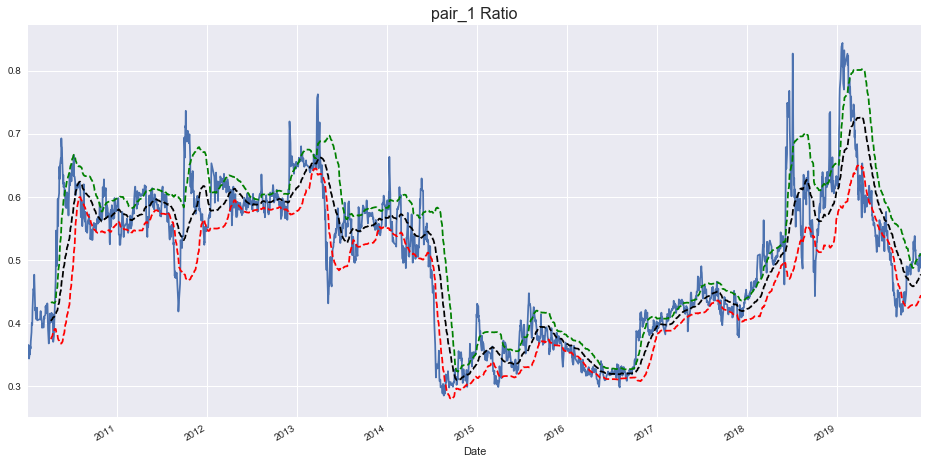

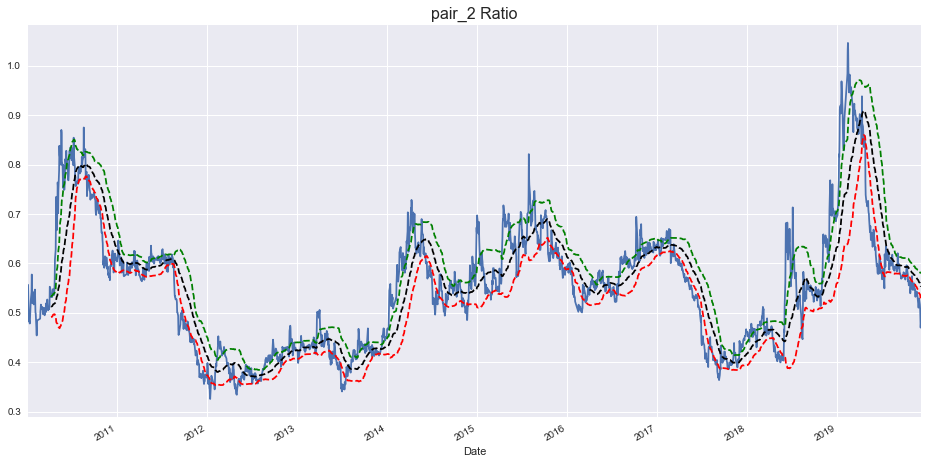

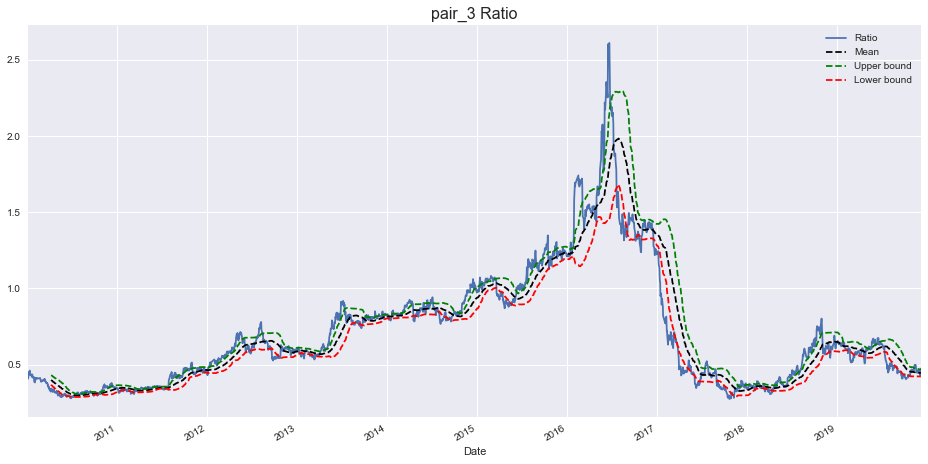

In [47]:
for key,value in pair_dict.items():
    plt.figure(figsize=(16,8))
    Spread_Ratio_dict[key].plot(label='Ratio')
    plt.title('{} Ratio'.format(key),fontsize=16);
    Spread_Ratio_MA_dict[key].plot(label='Mean',ls='--',c='black')
    upper_bound_dict[key].plot(label='Upper bound',ls='--',c='g')
    lower_bound_dict[key].plot(label='Lower bound',ls='--',c='r');

plt.legend();

In [48]:
#計算交易訊號
signal_dict={}
for key,value in pair_dict.items():
    
    
    
    signal_df=pd.Series(signal,index=Spread_Ratio_dict[key].index)
    signal_dict[key]=signal_df

In [49]:
position_dict={}
for key,value in pair_dict.items():
    position_dict[key]=signal_dict[key].shift(1)

In [50]:
#計算多空部位
for key,value in pair_dict.items():


In [51]:
wealth=1000000

In [52]:
#計算交易股數
trade_return_dict={}
for key,value in pair_dict.items():
    
    trade_stock_df=pd.concat([(signal_df*close_df[value[0]]).shift(1),(signal_df*close_df[value[1]]).shift(1)],axis=1,keys=[value[0],value[1]])


    return_df=pd.concat([close_df[value[0]].diff(1),close_df[value[1]].diff(1)],axis=1,keys=[value[0],value[1]])

    trade_return_df=(return_df*trade_stock_df)
    cum_trade_return_df=(return_df*trade_stock_df).cumsum()
    cum_trade_return_df['Total Return']=cum_trade_return_df.sum(axis=1)
    
    trade_return_dict[key]=cum_trade_return_df['Total Return']    

In [53]:
cum_trade_percent_return_dict={}
for key,value in pair_dict.items():
    cum_trade_percent_return_dict[key]=(trade_return_dict[key]/wealth)*100

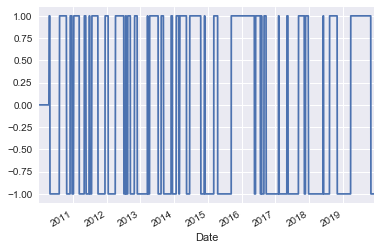

In [54]:
position_dict['pair_1'].plot()

In [755]:
for key,value in pair_dict.items():
    fig,ax=plt.subplots(figsize=(16,6))
    cum_trade_percent_return_dict[key].plot(label='Total Return',ax=ax)
    plt.legend()
    plt.title('Stock & Total Return',fontsize=16);

NameError: name 'pair_dict' is not defined

In [56]:
MDD_series_dict={}
for key,value in pair_dict.items():
    MDD_series_dict[key]=cum_trade_percent_return_dict[key].cummax()-cum_trade_percent_return_dict[key]

In [57]:
high_index_dict={}
for key,value in pair_dict.items():
    high_index_dict[key]=cum_trade_percent_return_dict[key][cum_trade_percent_return_dict[key].cummax()==cum_trade_percent_return_dict[key]].index

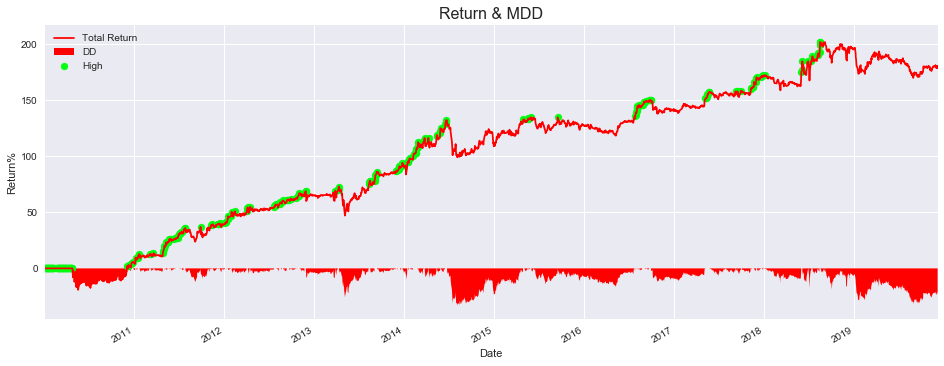

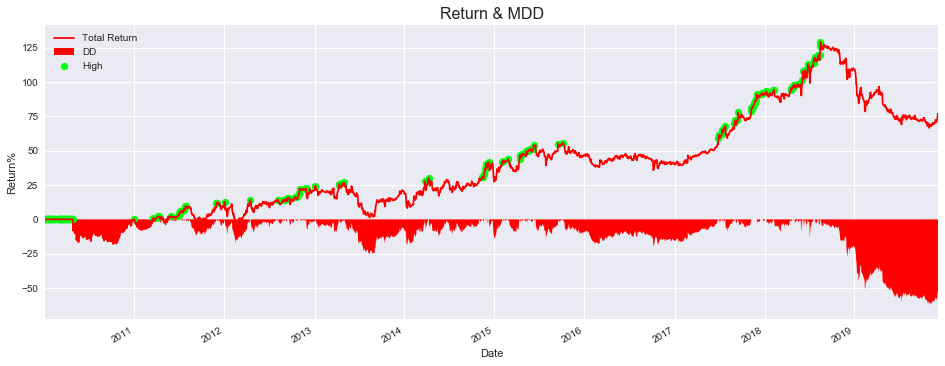

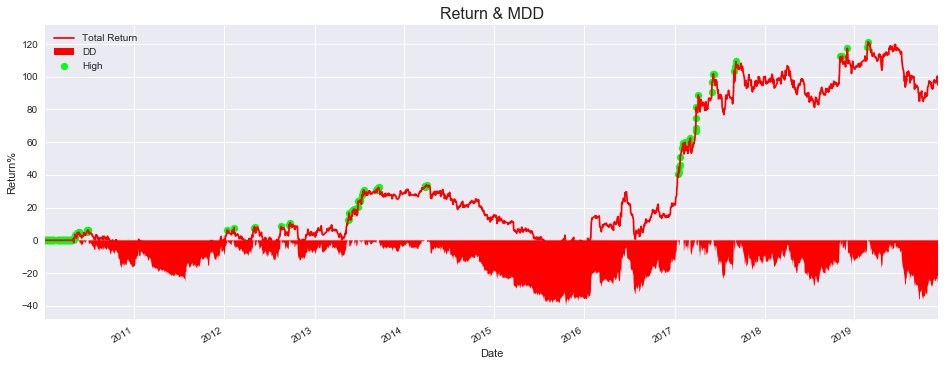

In [58]:
for key,value in pair_dict.items():
    fig,ax=plt.subplots(figsize=(16,6))

    (cum_trade_percent_return_dict[key]).plot(label='Total Return',ax=ax,c='r')
    plt.fill_between(MDD_series_dict[key].index,-MDD_series_dict[key],0,facecolor='r',label='DD')
    plt.scatter(high_index_dict[key],cum_trade_percent_return_dict[key].loc[high_index_dict[key]],c='#02ff0f',label='High')

    plt.legend()
    plt.ylabel('Return%')
    plt.xlabel('Date')
    plt.title('Return & MDD',fontsize=16);


In [59]:
for key,value in pair_dict.items():

    MDD=round(MDD_series_dict[key].max(),2)
    Cumulative_Return=round(cum_trade_percent_return_dict[key].iloc[-1],2)
    Return_on_MDD=round(cum_trade_percent_return_dict[key].iloc[-1]/MDD_series_dict[key].max(),2)
    daily_return=cum_trade_percent_return_dict[key].diff(1)
    print('{}\n{}/{}'.format(key,value[0],value[1]))
    print('Cumulative Return: {}%'.format(Cumulative_Return))
    print('MDD: {}%'.format(MDD))
    print('Return on MDD: {}'.format(Return_on_MDD))
    print('Shapre Ratio: {}'.format(round((daily_return.mean()/daily_return.std())*pow(252,0.5),2)))
    print('')

pair_1
2302/2329
Cumulative Return: 178.53%
MDD: 33.09%
Return on MDD: 5.4
Shapre Ratio: 0.82

pair_2
2302/2303
Cumulative Return: 75.99%
MDD: 62.75%
Return on MDD: 1.21
Shapre Ratio: 0.37

pair_3
2303/2337
Cumulative Return: 97.01%
MDD: 39.83%
Return on MDD: 2.44
Shapre Ratio: 0.44



In [60]:
pd.DataFrame(cum_trade_percent_return_dict)

,pair_1,pair_2,pair_3
Date,,,
2010-01-04,0.000000,0.000000,0.000000
2010-01-05,0.000000,0.000000,0.000000
2010-01-06,0.000000,0.000000,0.000000
2010-01-07,0.000000,0.000000,0.000000
2010-01-08,0.000000,0.000000,0.000000
...,...,...,...
2019-12-02,178.528230,71.886356,97.819139
2019-12-03,180.540612,72.748425,100.263520
2019-12-04,180.327473,74.723819,98.136156


In [61]:
total_return_df=pd.DataFrame(cum_trade_percent_return_dict)

In [62]:
#Equal Weighted組成投組
Portfolio_Return=(total_return_df/len(total_return_df.columns)).sum(axis=1)

In [63]:
MDD_series=Portfolio_Return.cummax()-Portfolio_Return
high_index=Portfolio_Return[Portfolio_Return.cummax()==Portfolio_Return].index

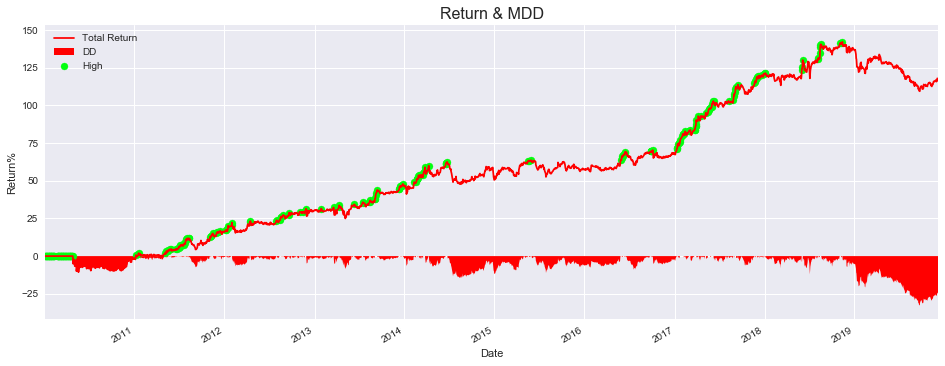

In [64]:
fig,ax=plt.subplots(figsize=(16,6))

(Portfolio_Return).plot(label='Total Return',ax=ax,c='r')
plt.fill_between(MDD_series.index,-MDD_series,0,facecolor='r',label='DD')
plt.scatter(high_index,Portfolio_Return.loc[high_index],c='#02ff0f',label='High')

plt.legend()
plt.ylabel('Return%')
plt.xlabel('Date')
plt.title('Return & MDD',fontsize=16);


In [65]:
MDD=round(MDD_series.max(),2)
Cumulative_Return=round(Portfolio_Return.iloc[-1],2)
Return_on_MDD=round(Portfolio_Return.iloc[-1]/MDD_series.max(),2)
daily_return=Portfolio_Return.diff(1)
print('Portfolio')
print('Cumulative Return: {}%'.format(Cumulative_Return))
print('MDD: {}%'.format(MDD))
print('Return on MDD: {}'.format(Return_on_MDD))
print('Shapre Ratio: {}'.format(round((daily_return.mean()/daily_return.std())*pow(252,0.5),2)))
print('')

Portfolio
Cumulative Return: 117.18%
MDD: 32.74%
Return on MDD: 3.58
Shapre Ratio: 0.88

